In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Read Churn Dataset and get summary of basic statistics
df=pd.read_csv('./Resources/Churn_Modelling_2.csv')
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Before Remove Outliers

In [5]:
#Remove columns not needed for analysis
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#Encoded Gender
df['Gender']=df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
clist= [df['CreditScore'],df['Age'],df['Tenure'],df['Balance'],df['NumOfProducts'],df['EstimatedSalary']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2c000066b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0000850d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0000668b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c000085610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0000858b0>],
 'means': []}

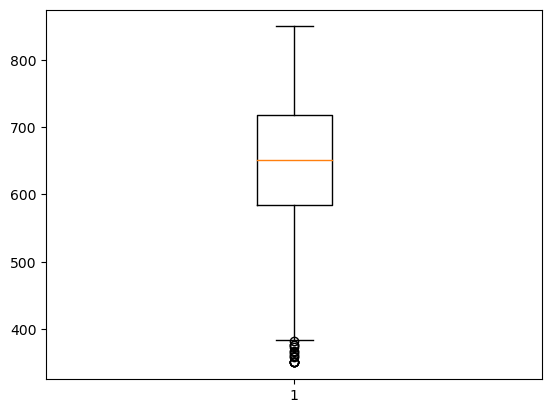

In [8]:
#Credit Score Boxplot
plt.boxplot(clist[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0000f2a00>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0000f2f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0000f28b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0001034f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c000103790>],
 'means': []}

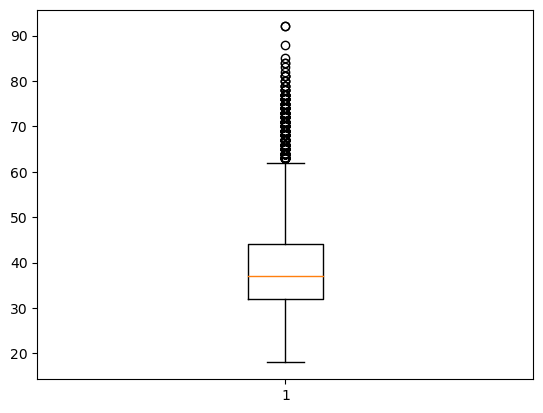

In [9]:
#Age Boxplot
plt.boxplot(clist[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c000169e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0001753d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c000169bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c000175910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c000175bb0>],
 'means': []}

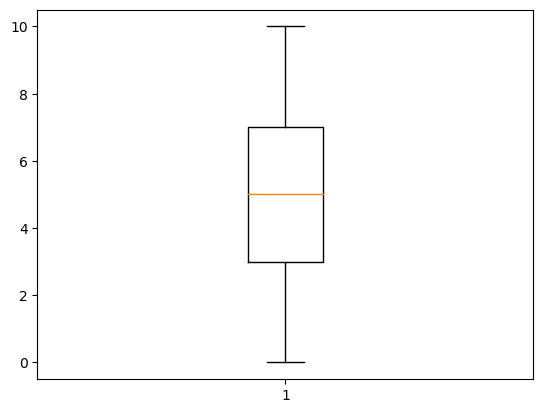

In [10]:
#Tenure Boxplot
plt.boxplot(clist[2])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0001db9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0001dbf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0001db730>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0001ea490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0001ea730>],
 'means': []}

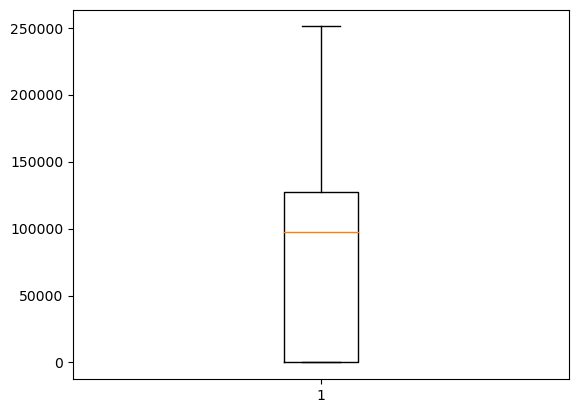

In [11]:
#Balance Boxplot
plt.boxplot(clist[3])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0002d19d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0002d1f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0002d1730>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0002de3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0002de670>],
 'means': []}

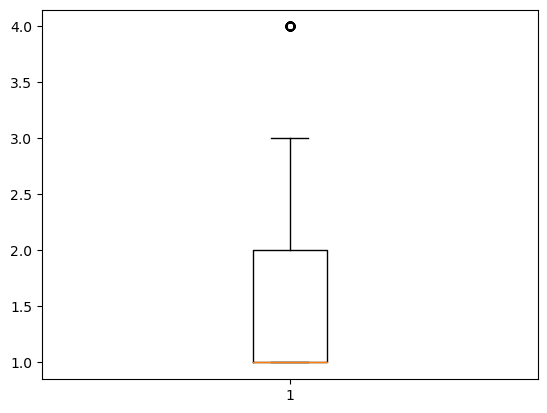

In [12]:
#Num of Products Boxplot
plt.boxplot(clist[4])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c00144edf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c00145d370>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c00144eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x2c00145d850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c00145daf0>],
 'means': []}

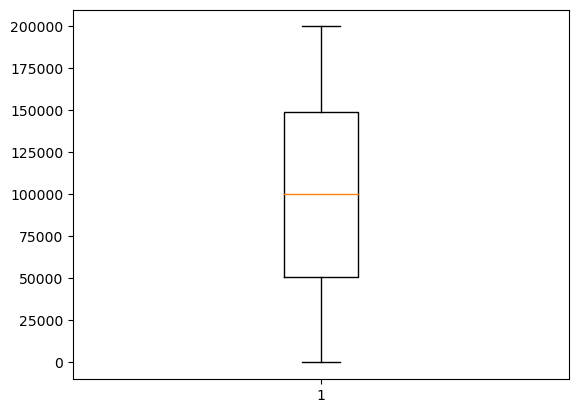

In [13]:
#Estimated Salary Boxplot
plt.boxplot(clist[5])

In [14]:
#Before removing Credit Score outliers, find if Gender impacts Credit Score with significantly different mean using T-test 
from scipy.stats import ttest_ind
tset, gender_pval = ttest_ind(df['CreditScore'], df['Gender'])
print(gender_pval)

0.0


In [15]:
#Identify if Credit Scores impacts wheter customer exited with significantly different means using T-test
tset, csexited_pval = ttest_ind(df['CreditScore'], df['Exited'])
print(csexited_pval)

0.0


In [16]:
#Identify if Age impacts wheter customer exited with significantly different means using T-test
tset, ageexited_pval = ttest_ind(df['Age'], df['Exited'])
print(ageexited_pval)

0.0


In [17]:
#Identify if Tenure impacts wheter customer exited with significantly different means using T-test
tset, texited_pval = ttest_ind(df['Tenure'], df['Exited'])
print(texited_pval)

0.0


In [18]:
#Identify if Balance impacts wheter customer exited with significantly different means using T-test
tset, bexited_pval = ttest_ind(df['Balance'], df['Exited'])
print(bexited_pval)

0.0


In [19]:
#Identify if number of products impacts wheter customer exited with significantly different means using T-test
tset, numprdexited_pval = ttest_ind(df['NumOfProducts'], df['Exited'])
print(numprdexited_pval)

0.0


In [20]:
#Identify if estimated salary impacts wheter customer exited with significantly different means using T-test
tset, esexited_pval = ttest_ind(df['EstimatedSalary'], df['Exited'])
print(esexited_pval)

0.0


### Pearson Corelation before outliers of Credit Score removal

In [21]:
import numpy as np
import scipy.stats

In [22]:
r, p = scipy.stats.pearsonr(df['Exited'], df['CreditScore'])
r

-0.027093539754657968

In [23]:
p

0.006738213892234391

In [24]:
r, p = scipy.stats.pearsonr(df['Exited'], df['Age'])
r

0.28532303783506974

In [25]:
p

1.2399313093427703e-186

In [26]:
r, p = scipy.stats.pearsonr(df['Exited'], df['Tenure'])
r

-0.01400061225344481

In [27]:
p

0.16152684949563184

In [28]:
r, p = scipy.stats.pearsonr(df['Exited'], df['Balance'])
r

0.11853276877163466

In [29]:
p

1.2755633191593238e-32

In [30]:
r, p = scipy.stats.pearsonr(df['Exited'], df['NumOfProducts'])
r

-0.047819864949440974

In [31]:
p

1.7173330048138527e-06

In [63]:
r, p = scipy.stats.pearsonr(df['Exited'], df['HasCrCard'])
r

-0.0071377656030391385

In [64]:
p

0.47541491837913535

In [32]:
r, p = scipy.stats.pearsonr(df['Exited'], df['EstimatedSalary'])
r

0.01209686102684477

In [33]:
p

0.22644042802351397

In [77]:
import seaborn as sns

In [78]:
comat = df.corr()
round(comat,2)

C:\Users\jilld\AppData\Local\Temp\ipykernel_12836\3719036947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  comat = df.corr()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Gender,-0.00,1.00,-0.03,0.01,0.01,-0.02,0.01,0.02,-0.01,-0.11
Age,-0.00,-0.03,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,0.01,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.02,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.02,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,-0.11,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


<AxesSubplot: >

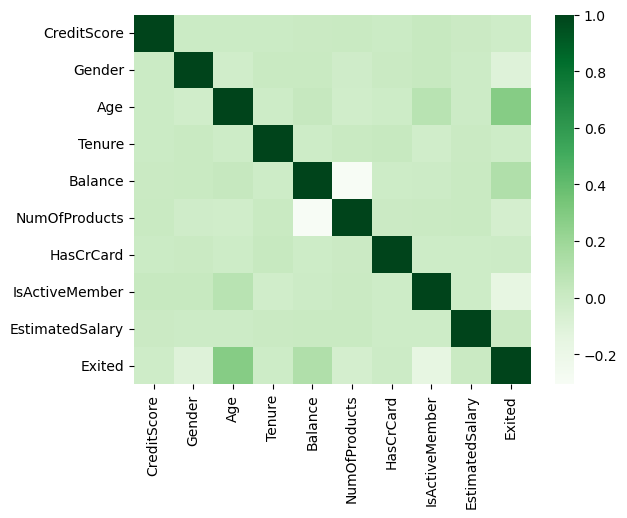

In [84]:
sns.heatmap(comat, cmap="Greens")

### Remove Outliers of Credit Score

In [34]:
#Remove Credit Score Outliers in a new DataFrame
import numpy as np
Q3 = np.quantile(df['CreditScore'], 0.75)
Q1 = np.quantile(df['CreditScore'], 0.25)
IQR = Q3 - Q1
    
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outlier_free_list = [x for x in df['CreditScore'] if (
    (x > lower_range) & (x < upper_range))]
filt_dt = df.loc[df['CreditScore'].isin(outlier_free_list)]

In [35]:
#Check new DataFrame after removing Credit Score outliers
filt_dt

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [36]:
#After removing Credit Score outliers, find if Gender impacts Credit Score with significant differences using T-test 
tset, gender_pval = ttest_ind(filt_dt['CreditScore'], filt_dt['Gender'])
print(gender_pval)

0.0


In [37]:
#Identify if Credit Scores impacts wheter customer exited with significantly different means using T-test
tset, csexited_pval = ttest_ind(filt_dt['CreditScore'], filt_dt['Exited'])
print(csexited_pval)

0.0


In [38]:
#Identify if Age impacts wheter customer exited with significantly different means using T-test
tset, ageexited_pval = ttest_ind(filt_dt['Age'], filt_dt['Exited'])
print(ageexited_pval)

0.0


In [39]:
#Identify if Tenure impacts wheter customer exited with significantly different means using T-test
tset, texited_pval = ttest_ind(filt_dt['Tenure'], filt_dt['Exited'])
print(texited_pval)

0.0


In [40]:
#Identify if Balance impacts wheter customer exited with significantly different means using T-test
tset, bexited_pval = ttest_ind(filt_dt['Balance'], filt_dt['Exited'])
print(bexited_pval)

0.0


In [41]:
#Identify if number of products impacts wheter customer exited with significantly different means using T-test
tset, numprdexited_pval = ttest_ind(filt_dt['NumOfProducts'], filt_dt['Exited'])
print(numprdexited_pval)

0.0


In [42]:
#Identify if estimated salary impacts wheter customer exited with significantly different means using T-test
tset, esexited_pval = ttest_ind(filt_dt['EstimatedSalary'], filt_dt['Exited'])
print(esexited_pval)

0.0


In [43]:
#Identify if Credit Scores impacts wheter customer exited with significantly different means using T-test
tset, csexited_pval = ttest_ind(filt_dt['CreditScore'], filt_dt['Exited'])
print(csexited_pval)

0.0


In [44]:
#Identify if Balance impacts wheter customer exited with significantly different means using T-test
tset, bexited_pval = ttest_ind(filt_dt['Balance'], filt_dt['Exited'])
print(bexited_pval)

0.0


In [45]:
#Identify if number of products impacts wheter customer exited with significantly different means using T-test
tset, numprdexited_pval = ttest_ind(filt_dt['NumOfProducts'], filt_dt['Exited'])
print(numprdexited_pval)

0.0


In [46]:
#Identify if estimated salary impacts wheter customer exited with significantly different means using T-test
tset, esexited_pval = ttest_ind(filt_dt['EstimatedSalary'], filt_dt['Exited'])
print(esexited_pval)

0.0


### Pearson Corelation after outliers of Credit Score removal

In [47]:
import numpy as np
import scipy.stats

In [48]:
r, p = scipy.stats.pearsonr(filt_dt['Exited'], filt_dt['CreditScore'])
r

-0.017839953290920037

In [49]:
p

0.07466997799917025

In [50]:
r, p = scipy.stats.pearsonr(filt_dt['Exited'], filt_dt['Age'])
r

0.2850289055849823

In [51]:
p

6.095832426568397e-186

In [52]:
r, p = scipy.stats.pearsonr(filt_dt['Exited'], filt_dt['Tenure'])
r

-0.013288778973060519

In [53]:
p

0.18427500739292305

In [54]:
r, p = scipy.stats.pearsonr(filt_dt['Exited'], filt_dt['Balance'])
r

0.11847923127971396

In [55]:
p

1.5250902115551114e-32

In [56]:
r, p = scipy.stats.pearsonr(filt_dt['Exited'], filt_dt['NumOfProducts'])
r

-0.047904655120509475

In [57]:
p

1.6779702807697878e-06

In [65]:
r, p = scipy.stats.pearsonr(filt_dt['Exited'], filt_dt['HasCrCard'])
r

-0.007911352557775659

In [66]:
p

0.42928516138895073

In [58]:
r, p = scipy.stats.pearsonr(filt_dt['Exited'], filt_dt['EstimatedSalary'])
r

0.010043290109987524

In [59]:
p

0.31565590402401766

In [83]:
comat = filt_dt.corr()
round(comat,2)

C:\Users\jilld\AppData\Local\Temp\ipykernel_12836\4242021294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  comat = filt_dt.corr()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,-0.00,-0.00,0.01,0.01,-0.00,0.02,0.00,-0.02
Gender,-0.00,1.00,-0.03,0.02,0.01,-0.02,0.01,0.02,-0.01,-0.11
Age,-0.00,-0.03,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,-0.00,0.02,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.01,0.03,-0.01,1.00,-0.31,-0.02,-0.01,0.01,0.12
NumOfProducts,0.01,-0.02,-0.03,0.01,-0.31,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.00,0.01,-0.01,0.02,-0.02,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.02,0.02,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,0.00,-0.01,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.02,-0.11,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


<AxesSubplot: >

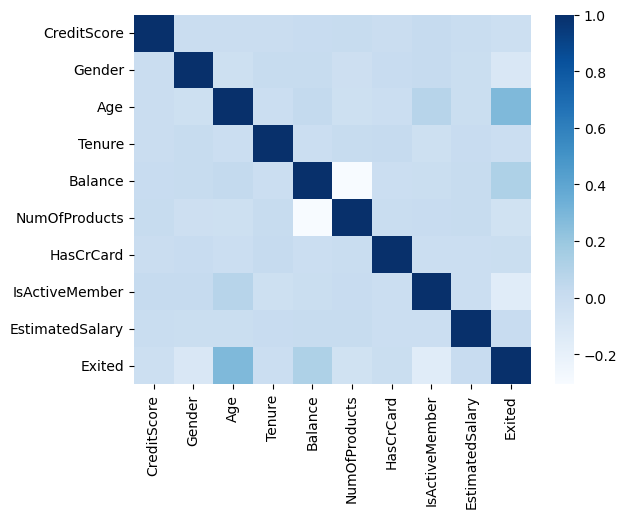

In [86]:
sns.heatmap(comat, cmap="Blues")

### Remove features, 'Tenure', 'HasCrCard' and 'Estimated Salary', without significant corelation 

In [68]:
new_df = df.drop(['Tenure','HasCrCard','EstimatedSalary'], axis=1)

In [69]:
new_df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,0,42,0.00,1,1,1
1,608,Spain,0,41,83807.86,1,1,0
2,502,France,0,42,159660.80,3,0,1
3,699,France,0,39,0.00,2,0,0
4,850,Spain,0,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,1,39,0.00,2,0,0
9996,516,France,1,35,57369.61,1,1,0
9997,709,France,0,36,0.00,1,1,1
9998,772,Germany,1,42,75075.31,2,0,1


In [ ]:
import seaborn as sns

In [72]:
comat = new_df.corr()
round(comat,2)

C:\Users\jilld\AppData\Local\Temp\ipykernel_12836\519438915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  comat = new_df.corr()


,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
CreditScore,1.00,-0.00,-0.00,0.01,0.01,0.03,-0.03
Gender,-0.00,1.00,-0.03,0.01,-0.02,0.02,-0.11
Age,-0.00,-0.03,1.00,0.03,-0.03,0.09,0.29
Balance,0.01,0.01,0.03,1.00,-0.30,-0.01,0.12
NumOfProducts,0.01,-0.02,-0.03,-0.30,1.00,0.01,-0.05
IsActiveMember,0.03,0.02,0.09,-0.01,0.01,1.00,-0.16
Exited,-0.03,-0.11,0.29,0.12,-0.05,-0.16,1.00


<AxesSubplot: >

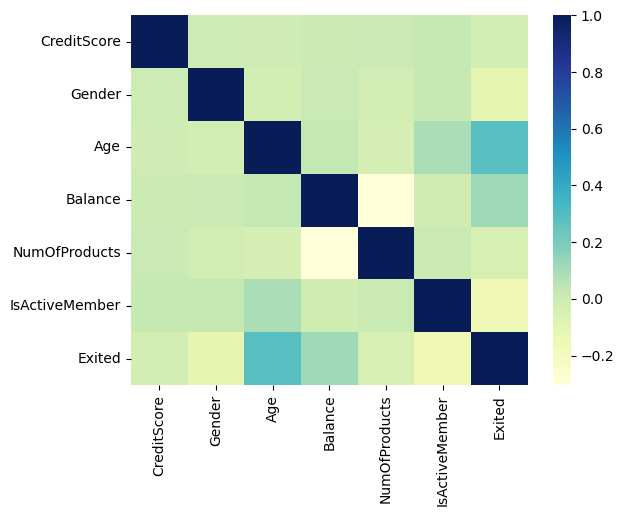

In [76]:
sns.heatmap(comat, cmap="YlGnBu")